In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

# loading dataset

In [2]:
df = pd.read_excel("game.xlsx")
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes


In [3]:
df.drop("Days", axis =1 ,inplace = True)

In [4]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [5]:
x = df.drop("Wear Jacket?",axis =1)
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [7]:
y= df[["Wear Jacket?"]]

In [8]:
y.head()

,Wear Jacket?
0,No
1,Yes
2,No
3,Yes
4,Yes


# Label Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()

In [16]:
from pandas.core.dtypes.common import is_numeric_dtype

In [17]:
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else :
        x[col]= le.fit_transform(x[col])

In [18]:
x.head() # accending order e sajay lebel encoding

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [19]:
# cloud =0 sunny =1
# cold =0 warm =1
#indoor =0 outdoor = 1

In [20]:
clf =DecisionTreeClassifier()

In [21]:
clf.fit(x,y)

DecisionTreeClassifier()

In [22]:
clf.predict([[0,0,0]])

array(['Yes'], dtype=object)

In [23]:
clf.predict([[0,0,1]])

array(['Yes'], dtype=object)

In [24]:
clf.predict([[1,0,0]])

array(['No'], dtype=object)

In [25]:
clf.predict([[1,1,0]])

array(['No'], dtype=object)

# Class 6

# Confussion Matrix

In [30]:
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn import tree
from sklearn.metrics import classification_report ,accuracy_score ,confusion_matrix,roc_curve

In [31]:
df = pd.read_excel("heart.xlsx")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [32]:
df.shape

(299, 13)

In [36]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

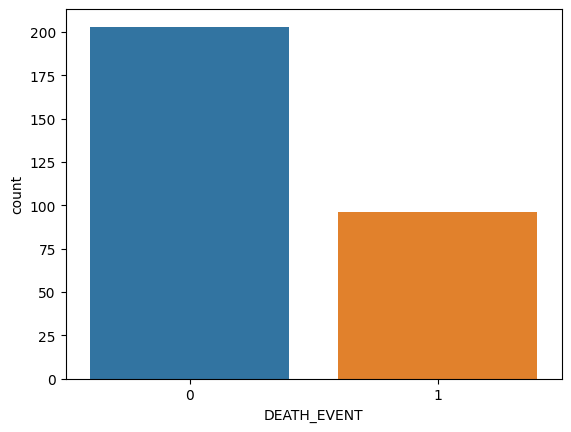

In [45]:
sns.countplot(x=df["DEATH_EVENT"])

<Axes: xlabel='diabetes', ylabel='count'>

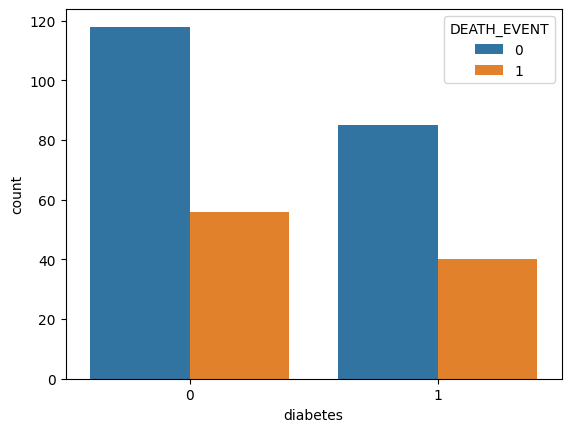

In [49]:
sns.countplot(x="diabetes", hue= "DEATH_EVENT",data =df)

<Axes: xlabel='high_blood_pressure', ylabel='count'>

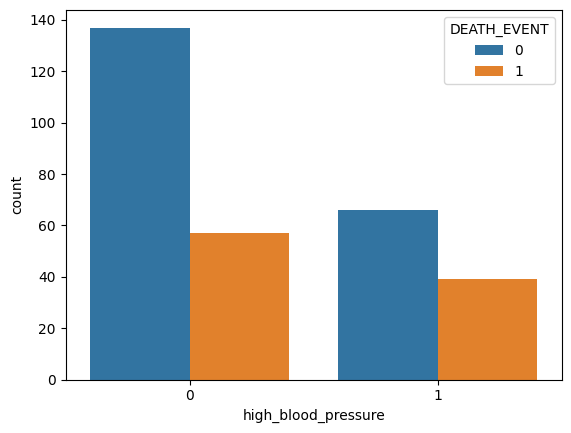

In [50]:
sns.countplot(x ="high_blood_pressure", hue= "DEATH_EVENT" ,data=df)

In [51]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: title={'center': 'Correlation For every Coulmn'}>

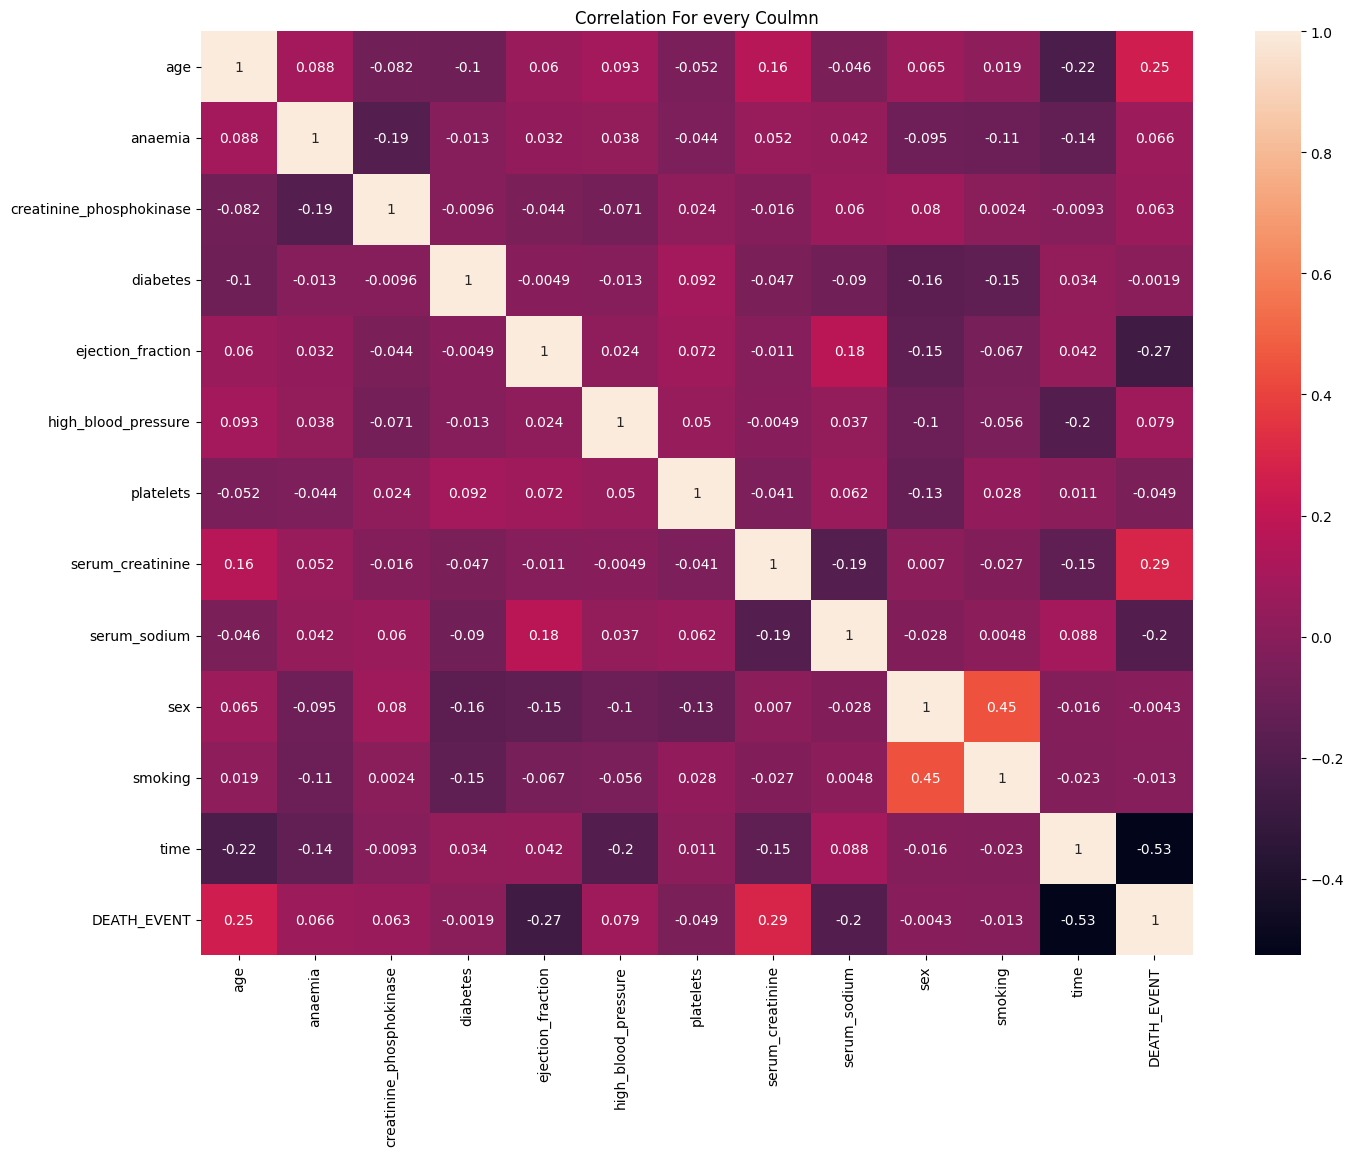

In [53]:
plt.figure(figsize=(16,12))
plt.title('Correlation For every Coulmn')
sns.heatmap(df.corr(), annot=True)

# Separate X,Y

In [62]:
x=df.drop("DEATH_EVENT", axis=1)

In [63]:
y= df[["DEATH_EVENT"]]

In [64]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [65]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


# Train Test Split

In [67]:
xtrain, xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [68]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [69]:
ytrain.head()

,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1


In [70]:
xtrain.shape

(209, 12)

In [71]:
xtest.shape

(90, 12)

In [72]:
dt= DecisionTreeClassifier()

In [73]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

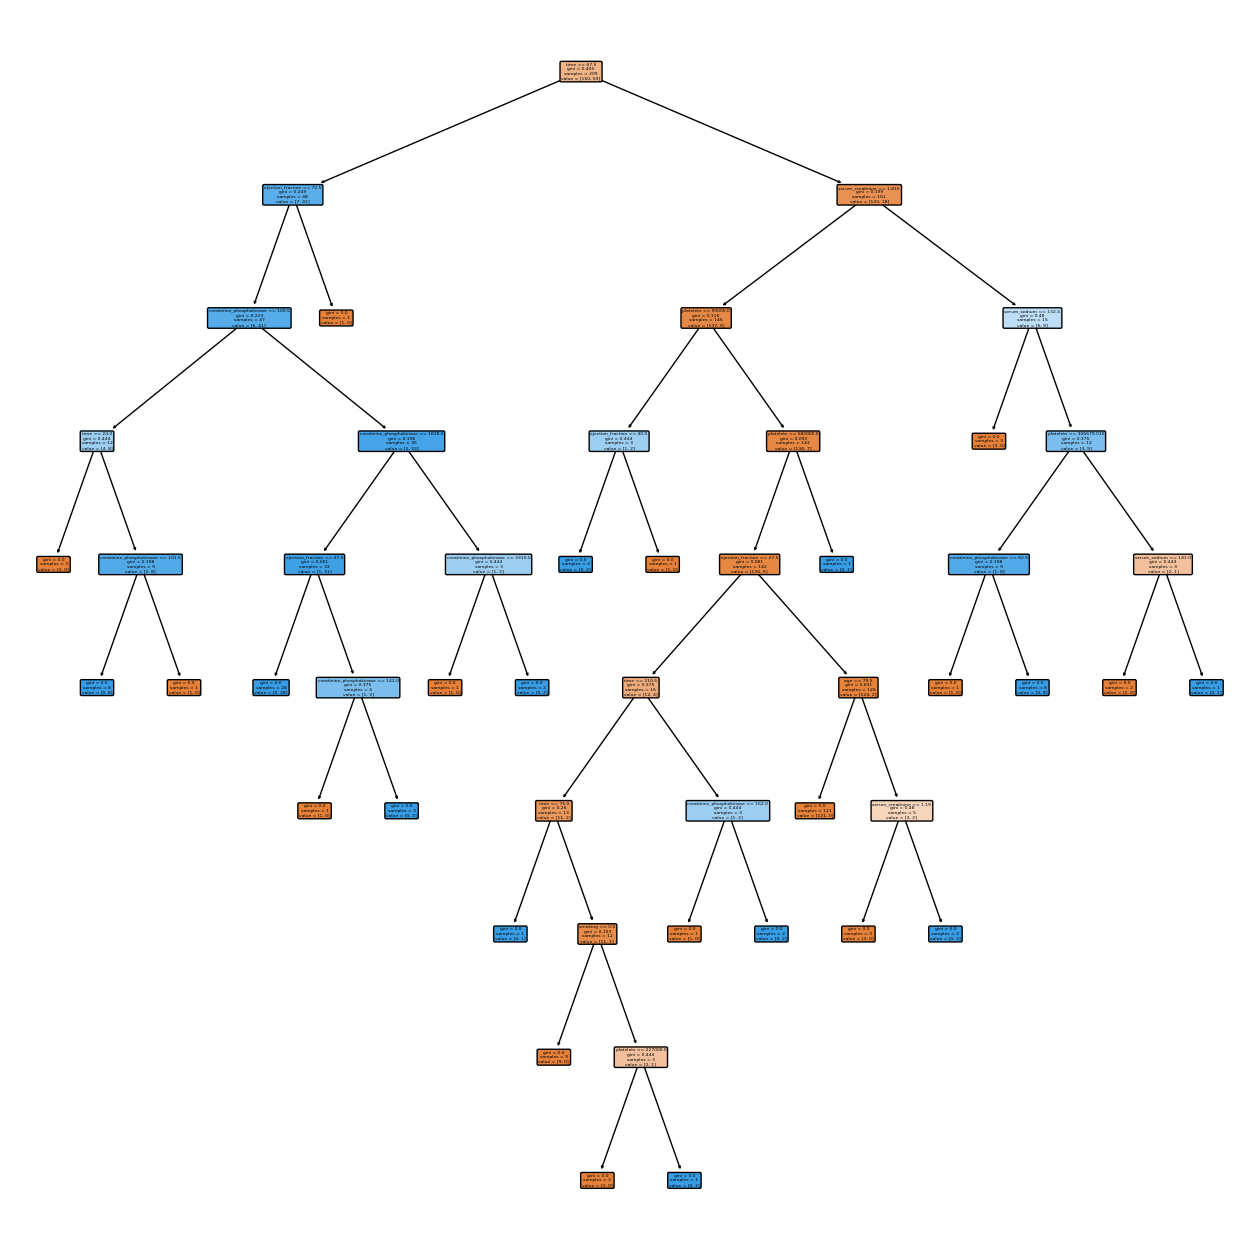

In [75]:
plt.figure(figsize=(16,16))
tree.plot_tree(dt,filled =True ,rounded= True,feature_names =x.columns)
plt.savefig("tree.png",dpi=1200)

In [76]:
pred= dt.predict(xtest)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1], dtype=int64)

In [77]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# Confussion Matrix

In [79]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.71      0.77      0.74        53\n           1       0.62      0.54      0.58        37\n\n    accuracy                           0.68        90\n   macro avg       0.67      0.66      0.66        90\nweighted avg       0.67      0.68      0.67        90\n'

In [80]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74        53
           1       0.62      0.54      0.58        37

    accuracy                           0.68        90
   macro avg       0.67      0.66      0.66        90
weighted avg       0.67      0.68      0.67        90



In [81]:
cm =confusion_matrix(ytest,pred)

In [82]:
cm #[true positive, false negative]
   #[false positive, true negative]

array([[41, 12],
       [17, 20]], dtype=int64)

Text(0.5, 1.0, 'Confussion Matrix')

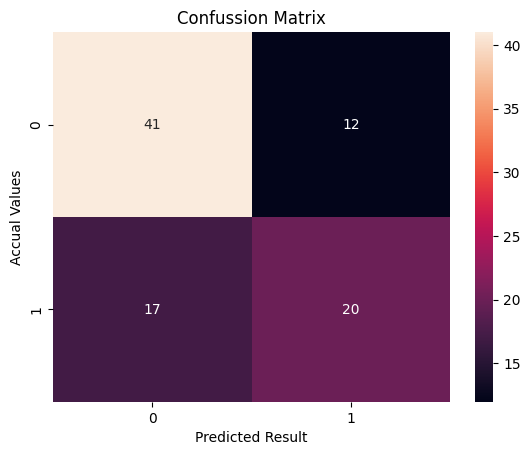

In [85]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Result")
plt.ylabel("Accual Values")
plt.title("Confussion Matrix")

In [87]:
tp,fn,fp,tn= confusion_matrix(ytest,pred).reshape(-1)

In [88]:
tp

41

In [89]:
fp

17

In [90]:
accuracy =(tp+tn)/(tn+fn+tp+fp)
accuracy

0.6777777777777778

In [91]:
precision = tp/(tp+fp)
precision

0.7068965517241379

# ROC AUC Cruve

In [94]:
fpr, tpr, thresholds = roc_curve(ytest, pred)

Text(0.5, 1.0, 'Decision Tree ROC Curve')

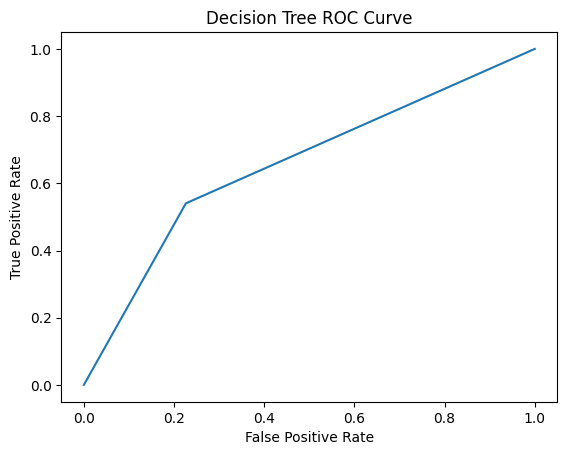

In [97]:
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel( "True Positive Rate")
plt.title('Decision Tree ROC Curve')

In [100]:
accuracy_score(ytest,pred)

0.6777777777777778

In [101]:
dt.score(xtest,ytest)

0.6777777777777778